In [29]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

K.tensorflow_backend._get_available_gpus()

base_dir = r'C:\Users\Vítor\Documents\TCC\Banco de Dados\BD_Sem_Pretos\Sagital\BD'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [30]:
from keras import layers
from keras import models
from keras.callbacks import ModelCheckpoint,LearningRateScheduler
#Criando a CNN
model = models.Sequential()
model.add(layers.Conv2D(128, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 128)     3584      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 128)       147584    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 256)       295168    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 256)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 256)       590080    
__________

In [32]:
from keras import optimizers

# SGD (Descida do Gradiente Estocástico) - Otimizador 
momentum = 0.5
sgd = optimizers.SGD(lr=0.01, momentum=momentum, decay=0.0, nesterov=False) 

model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['acc'])

In [33]:
from keras.preprocessing.image import ImageDataGenerator

# Todas as imagens em nova scale
train_datagen = ImageDataGenerator(rescale=1./255,  width_shift_range=0.2,  
    height_shift_range=0.2,
    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255,   width_shift_range=0.2,  
    height_shift_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        
        train_dir,
        # Todas as images para novo tamanho de 150x150
        target_size=(150, 150),
        batch_size=20,
        # Como foi usado a perda binary_crossentropy, precisamos de rótulos binários
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 8349 images belonging to 2 classes.
Found 1574 images belonging to 2 classes.
Found 1572 images belonging to 2 classes.


In [34]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [35]:
import math
def step_decay(epoch):
    
    
    initial_lrate=0.1
    drop=0.6
    epochs_drop = 3.0
    lrate= initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
    return lrate
   

lrate = LearningRateScheduler(step_decay)
callbacks_list = [ lrate]

In [36]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 66s 657ms/step - loss: 0.6931 - acc: 0.5235 - val_loss: 0.6889 - val_acc: 0.5950
Epoch 2/30
100/100 [==============================] - 55s 550ms/step - loss: 0.6852 - acc: 0.5605 - val_loss: 0.6565 - val_acc: 0.6318
Epoch 3/30
100/100 [==============================] - 48s 477ms/step - loss: 0.6880 - acc: 0.5485 - val_loss: 0.6500 - val_acc: 0.6600
Epoch 4/30
100/100 [==============================] - 49s 486ms/step - loss: 0.6825 - acc: 0.5615 - val_loss: 0.6549 - val_acc: 0.6197
Epoch 5/30
100/100 [==============================] - 49s 492ms/step - loss: 0.6835 - acc: 0.5627 - val_loss: 0.6529 - val_acc: 0.6056
Epoch 6/30
100/100 [==============================] - 48s 480ms/step - loss: 0.6778 - acc: 0.5545 - val_loss: 0.6053 - val_acc: 0.6640
Epoch 7/30
100/100 [==============================] - 50s 495ms/step - loss: 0.6701 - acc: 0.5725 - val_loss: 0.6107 - val_acc: 0.6388
Epoch 8/30
100/100 [==============================] - 5

In [37]:
import matplotlib.pyplot as plt

accTR = history.history['acc']
val_acc = history.history['val_acc']
lossTR = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

In [38]:
history = model.fit_generator(
      test_generator,
      steps_per_epoch=100,
      epochs=30,
      callbacks=callbacks_list)

Epoch 1/30
100/100 [==============================] - 45s 448ms/step - loss: 0.6538 - acc: 0.6495
Epoch 2/30
100/100 [==============================] - 42s 422ms/step - loss: 0.6436 - acc: 0.6578
Epoch 3/30
100/100 [==============================] - 43s 426ms/step - loss: 0.6428 - acc: 0.6503
Epoch 4/30
100/100 [==============================] - 42s 423ms/step - loss: 0.6367 - acc: 0.6593
Epoch 5/30
100/100 [==============================] - 42s 425ms/step - loss: 0.6445 - acc: 0.6422
Epoch 6/30
100/100 [==============================] - 42s 423ms/step - loss: 0.6268 - acc: 0.6595
Epoch 7/30
100/100 [==============================] - 42s 425ms/step - loss: 0.6299 - acc: 0.6587
Epoch 8/30
100/100 [==============================] - 42s 424ms/step - loss: 0.6277 - acc: 0.6545
Epoch 9/30
100/100 [==============================] - 42s 423ms/step - loss: 0.6225 - acc: 0.6572
Epoch 10/30
100/100 [==============================] - 42s 424ms/step - loss: 0.6217 - acc: 0.6577
Epoch 11/30
100/100

A acurácia do teste é de: 0.7228915649484918
A perda do teste é de: 0.538955913549925
A acurácia da validação é de: 0.6960000026226044
A perda da validação é de: 0.5751482236385346


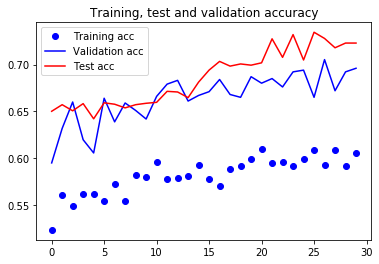

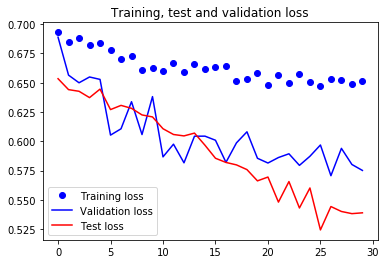

In [39]:
import matplotlib.pyplot as plt

accTe = history.history['acc']
lossTe = history.history['loss']
print('A acurácia do teste é de:', accTe[29])
print('A perda do teste é de:', lossTe[29])
print('A acurácia da validação é de:', val_acc[29])
print('A perda da validação é de:', val_loss[29])
epochs = range(len(acc))

plt.plot(epochs, accTR, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.plot(epochs, accTe, 'r', label='Test acc')
plt.title('Training, test and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, lossTR, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.plot(epochs, lossTe, 'r', label='Test loss')
plt.title('Training, test and validation loss')
plt.legend()

plt.show()

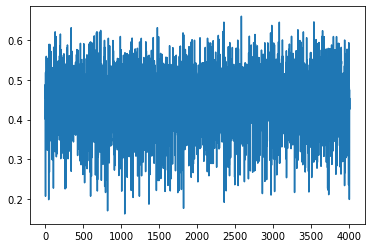

In [12]:
from sklearn.metrics import confusion_matrix
Y_prediction = model.predict_generator(test_generator,len(test_generator))
Y_pred_classes = np.argmax(Y_prediction,axis = 1) 
confusion_mtx = confusion_matrix(test_generator.classes, Y_pred_classes)
plt.plot(Y_prediction)

[[0.4017658 ]
 [0.48828858]
 [0.28243104]
 ...
 [0.45412466]
 [0.42556137]
 [0.4733508 ]]


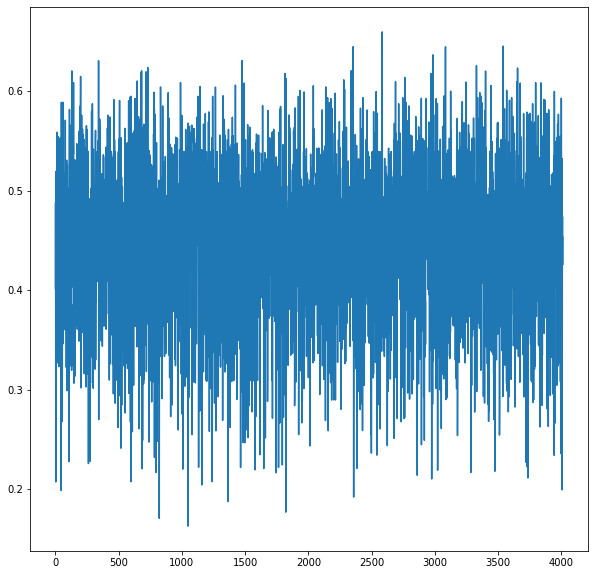

In [15]:
plt.figure(figsize=(10,10))
plt.plot(Y_prediction)
print (Y_prediction)

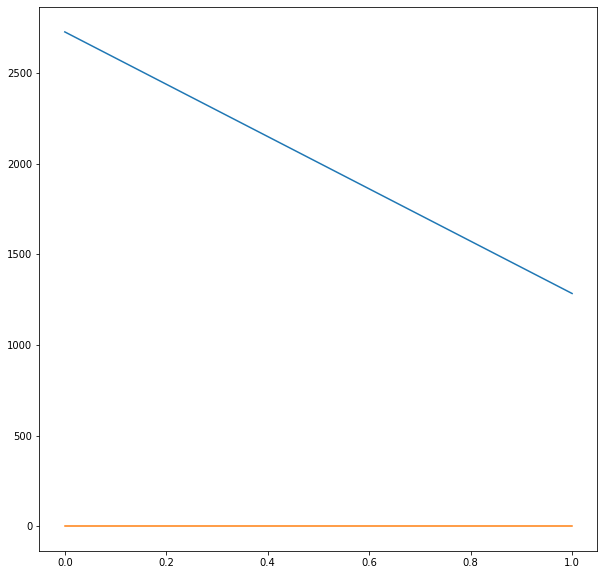

In [17]:
plt.figure(figsize=(10,10))
import seaborn as sns
sns.heatmap(confusion_mtx, annot=False, fmt="d");